In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 4s 0us/step
(50000, 32, 32, 3)
10


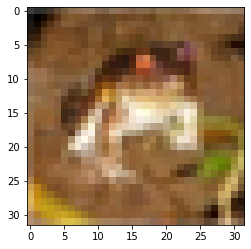

In [ ]:
# just data stuff
mnist = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(len(np.unique(train_labels)))
plt.imshow(train_images[0], cmap="Greys_r")

train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255., train_labels.reshape((-1)).astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 32, 32, 3]).astype(np.float32) / 255., test_labels.reshape((-1)).astype(np.int32))).batch(128)



In [ ]:
def train_model(model,train_data,optimizer,train_steps):

  train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for step, (image_batch, label_batch) in enumerate(train_data):
      if step > train_steps:
          break

      with tf.GradientTape() as tape:
          logits = model(image_batch)
          # loss format is generally: first argument targets, second argument outputs
          loss = loss_fn(label_batch, logits)

      # if you didn't build the model, it is important that you get the variables
      # AFTER the model has been called the first time
      variables = model.trainable_variables
      gradients = tape.gradient(loss, variables)
        
      optimizer.apply_gradients(zip(gradients, variables))
      
      train_acc_metric(label_batch, logits)
      
      if not step % 100:
          # this is different from before. there, we only evaluated accuracy
          # for one batch. Now, we always average over 100 batches
          print("Step {} Loss: {} Accuracy: {}".format(step, loss, train_acc_metric.result()))
          train_acc_metric.reset_states()
    

# Parameters of Exp 1
*   5 Layers of CONV with 32 filters of size 3 and "same" padding.
*   Activation is "relu".
*   optimizer is SGD with lr=1e-3




In [ ]:
train_steps = 4000

layer_list = [tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),  
              tf.keras.layers.Conv2D(1,3, padding ='same', activation= 'relu'),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Conv2D(64,3, padding ='same', activation= 'relu'),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)), 
              tf.keras.layers.Conv2D(128,3, padding ='same', activation= 'relu'),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dropout(0.1),
              tf.keras.layers.Dense(256, activation=tf.nn.relu),
              tf.keras.layers.Dense(10)]  # default is no activation
model = tf.keras.Sequential(layer_list)
optimizer = tf.optimizers.SGD(learning_rate=1e-3)  
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_model(model,train_data,optimizer,train_steps)

Step 0 Loss: 2.3026123046875 Accuracy: 0.09375
Step 100 Loss: 2.3024630546569824 Accuracy: 0.11554687470197678
Step 200 Loss: 2.3024768829345703 Accuracy: 0.12320312857627869
Step 300 Loss: 2.3024420738220215 Accuracy: 0.11609374731779099
Step 400 Loss: 2.3024659156799316 Accuracy: 0.12366687506437302
Step 500 Loss: 2.302417516708374 Accuracy: 0.1294531226158142
Step 600 Loss: 2.3022053241729736 Accuracy: 0.12664061784744263
Step 700 Loss: 2.3022806644439697 Accuracy: 0.11999999731779099
Step 800 Loss: 2.3021039962768555 Accuracy: 0.12892095744609833
Step 900 Loss: 2.3023529052734375 Accuracy: 0.13257811963558197
Step 1000 Loss: 2.3020315170288086 Accuracy: 0.12453124672174454
Step 1100 Loss: 2.302055835723877 Accuracy: 0.12664061784744263
Step 1200 Loss: 2.3019094467163086 Accuracy: 0.13252823054790497
Step 1300 Loss: 2.301786422729492 Accuracy: 0.1360156238079071
Step 1400 Loss: 2.302143096923828 Accuracy: 0.1368750035762787
Step 1500 Loss: 2.302204132080078 Accuracy: 0.1392187476158

In [ ]:

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.1404999941587448


# Parameters of Exp 2
*   5 Layers of CONV with 32 filters of size 3 and "same" padding.
*   Activation is "relu".
*   optimizer is Adam with lr=1e-3


In [ ]:
train_steps = 4000

layer_list = [tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),  
              tf.keras.layers.Conv2D(1,3, padding ='same', activation= 'relu'),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Conv2D(64,3, padding ='same', activation= 'relu'),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)), 
              tf.keras.layers.Conv2D(128,3, padding ='same', activation= 'relu'),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dropout(0.1),
              tf.keras.layers.Dense(256, activation=tf.nn.relu),
              tf.keras.layers.Dense(10)]  # default is no activation
model = tf.keras.Sequential(layer_list)
optimizer = tf.optimizers.Adam(learning_rate=1e-3)  
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_model(model,train_data,optimizer,train_steps)

Step 0 Loss: 2.3029608726501465 Accuracy: 0.09375
Step 100 Loss: 2.287672281265259 Accuracy: 0.10249999910593033
Step 200 Loss: 1.945021629333496 Accuracy: 0.20671874284744263
Step 300 Loss: 1.7617546319961548 Accuracy: 0.27796876430511475
Step 400 Loss: 1.722853422164917 Accuracy: 0.3194792866706848
Step 500 Loss: 1.5966570377349854 Accuracy: 0.3359375
Step 600 Loss: 1.6267393827438354 Accuracy: 0.3471093773841858
Step 700 Loss: 1.6514018774032593 Accuracy: 0.3557812571525574
Step 800 Loss: 1.6474624872207642 Accuracy: 0.37076535820961
Step 900 Loss: 1.6775158643722534 Accuracy: 0.38749998807907104
Step 1000 Loss: 1.6225885152816772 Accuracy: 0.38679686188697815
Step 1100 Loss: 1.5512458086013794 Accuracy: 0.40085938572883606
Step 1200 Loss: 1.8153610229492188 Accuracy: 0.4024466872215271
Step 1300 Loss: 1.510233759880066 Accuracy: 0.41695311665534973
Step 1400 Loss: 1.5447101593017578 Accuracy: 0.42179688811302185
Step 1500 Loss: 1.6727041006088257 Accuracy: 0.4312500059604645
Step 1

In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.4999000132083893


# Parameters of Exp 3
*   4 Layers of CONV with varying filters of size 3 and "same" padding.
*   max pooling of size 2
*   Activation is "relu".
*   optimizer is Adam with lr=1e-3


In [ ]:
train_steps = 3000

layer_list = [tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.Dropout(0.30),
              tf.keras.layers.Conv2D(64,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Dropout(0.30),
              tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
              tf.keras.layers.Dropout(0.30),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512, activation=tf.nn.relu),
              tf.keras.layers.Dropout(0.50),
              tf.keras.layers.Dense(256, activation=tf.nn.relu),
              tf.keras.layers.Dropout(0.50),
              tf.keras.layers.Dense(10)]  # default is no activation
best_model = tf.keras.Sequential(layer_list,name="m1")
optimizer = tf.optimizers.Adam(learning_rate=1e-3)  
#optimizer = tf.optimizers.SGD(learning_rate=1e-3)
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_model(best_model,train_data,optimizer,train_steps)

Step 0 Loss: 2.3013253211975098 Accuracy: 0.1015625
Step 100 Loss: 1.5779354572296143 Accuracy: 0.3130468726158142
Step 200 Loss: 1.4433218240737915 Accuracy: 0.47828125953674316
Step 300 Loss: 1.222942590713501 Accuracy: 0.5335156321525574
Step 400 Loss: 1.0208382606506348 Accuracy: 0.5839868187904358
Step 500 Loss: 0.9351308345794678 Accuracy: 0.647656261920929
Step 600 Loss: 0.9818804264068604 Accuracy: 0.6779687404632568
Step 700 Loss: 0.974353551864624 Accuracy: 0.6876562237739563
Step 800 Loss: 0.6073596477508545 Accuracy: 0.7095357775688171
Step 900 Loss: 0.6202611327171326 Accuracy: 0.7627343535423279
Step 1000 Loss: 0.7147907614707947 Accuracy: 0.760546863079071
Step 1100 Loss: 0.7093943357467651 Accuracy: 0.7725781202316284
Step 1200 Loss: 0.4795841872692108 Accuracy: 0.7917973399162292
Step 1300 Loss: 0.4073922038078308 Accuracy: 0.8460156321525574
Step 1400 Loss: 0.4782918691635132 Accuracy: 0.84375
Step 1500 Loss: 0.38424602150917053 Accuracy: 0.838671863079071
Step 1600 L

In [ ]:

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, best_model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.7095999717712402


# Parameters of Exp 4
*   4 Layers of CONV with varying filters of size 3 and "same" padding.
*   max pooling of size 2
*   Activation is "relu".
*   optimizer is SGD with lr=1e-3


In [ ]:
train_steps = 3000

layer_list = [tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.Conv2D(32,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.Dropout(0.30),
              tf.keras.layers.Conv2D(64,3, padding ='same', activation= tf.nn.relu),
              tf.keras.layers.MaxPool2D(pool_size= (2,2)),
              tf.keras.layers.Dropout(0.30),
              tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
              tf.keras.layers.Dropout(0.30),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(512, activation=tf.nn.relu),
              tf.keras.layers.Dropout(0.50),
              tf.keras.layers.Dense(256, activation=tf.nn.relu),
              tf.keras.layers.Dropout(0.50),
              tf.keras.layers.Dense(10)]  # default is no activation
model = tf.keras.Sequential(layer_list,name="m2")
#optimizer = tf.optimizers.Adam(learning_rate=1e-3)  
optimizer = tf.optimizers.SGD(learning_rate=1e-3)
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_model(model,train_data,optimizer,train_steps)

Step 0 Loss: 2.298689603805542 Accuracy: 0.109375
Step 100 Loss: 2.2962327003479004 Accuracy: 0.11023437231779099
Step 200 Loss: 2.298861026763916 Accuracy: 0.13187499344348907
Step 300 Loss: 2.2774055004119873 Accuracy: 0.15742187201976776
Step 400 Loss: 2.2729759216308594 Accuracy: 0.15605394542217255
Step 500 Loss: 2.2648260593414307 Accuracy: 0.16570311784744263
Step 600 Loss: 2.278249740600586 Accuracy: 0.17468750476837158
Step 700 Loss: 2.226393222808838 Accuracy: 0.1860937476158142
Step 800 Loss: 2.2048444747924805 Accuracy: 0.22631743550300598
Step 900 Loss: 2.1841976642608643 Accuracy: 0.23820312321186066
Step 1000 Loss: 2.1080620288848877 Accuracy: 0.24710936844348907
Step 1100 Loss: 2.080267906188965 Accuracy: 0.2620312571525574
Step 1200 Loss: 2.0140316486358643 Accuracy: 0.288190096616745
Step 1300 Loss: 2.034120798110962 Accuracy: 0.30070313811302185
Step 1400 Loss: 2.043483257293701 Accuracy: 0.3060937523841858
Step 1500 Loss: 1.9667112827301025 Accuracy: 0.3118749856948

In [ ]:

test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for image_batch, label_batch in test_data:
    test_acc_metric(label_batch, model(image_batch))
print("Test acc: {}".format(test_acc_metric.result()))

Test acc: 0.3901999890804291


In [ ]:
best_model.layers

# Feature Map Visualization

In [ ]:
best_model.summary()

Model: "m1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 64)        0         
                                                                

In [ ]:
best_model.layers

In [ ]:
# filters , bias = model.layers[0].get_weights()
# f_min, f_max = filters.min(), filters.max()
# filters = (filters - f_min) / (f_max - f_min)

In [ ]:
model1 = tf.keras.Model(inputs=best_model.inputs , outputs=best_model.layers[3].output)

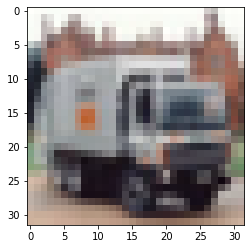

In [ ]:
plt.imshow(test_images[11])

In [ ]:
test_data_11 = tf.data.Dataset.from_tensor_slices(
    (test_images[11].reshape([-1, 32, 32, 3]).astype(np.float32) / 255., test_labels[11].reshape((-1)).astype(np.int32))).batch(128)

In [ ]:
for img, label in test_data_11:
  features = model1.predict(img)

1/1 [==============================] - 0s 14ms/step


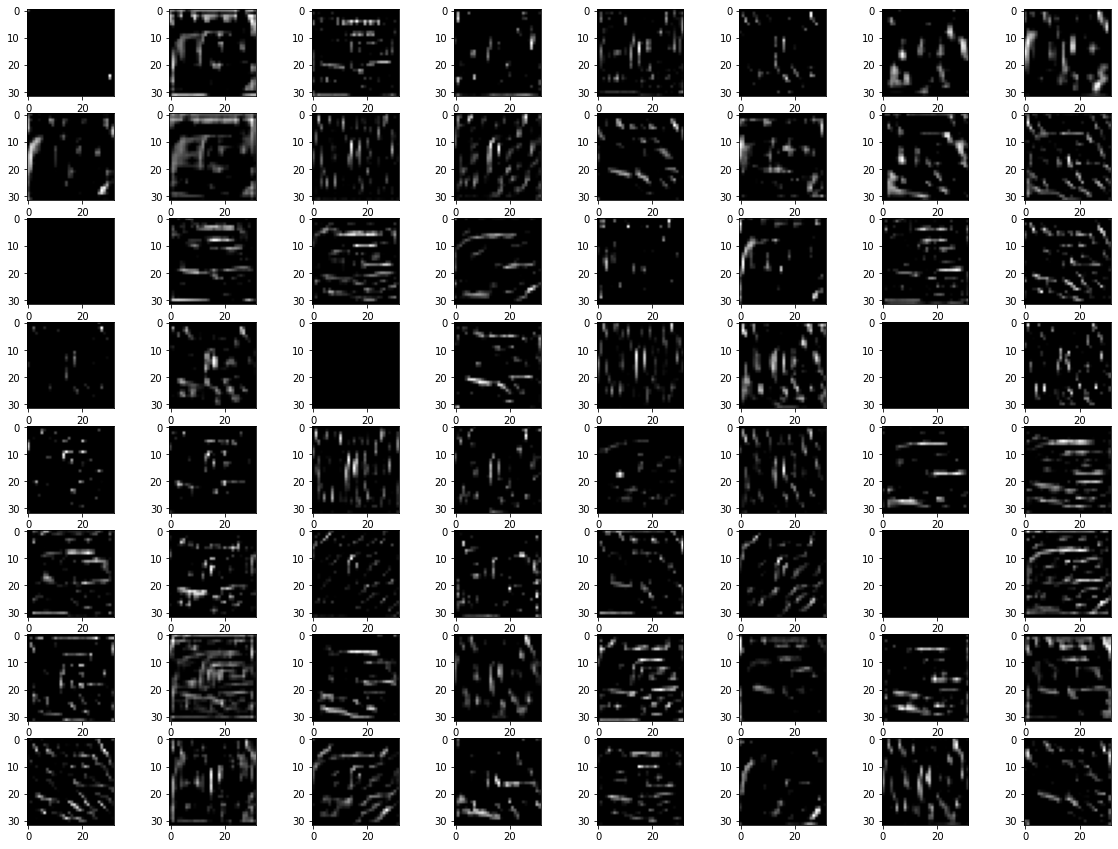

In [ ]:
import matplotlib.pyplot as pyplot
fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1], cmap="gray" )
    
pyplot.show()

In [ ]:
features.shape

(1, 32, 32, 64)